In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
%matplotlib inline  

# Create the years and durations lists
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95,95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {'years': years, 'durations': durations}

# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("datasets/netflix_data.csv")

# Print the first five rows of the DataFrame
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [2]:
# Create a DataFrame from the dictionary
durations_df = pd.DataFrame.from_dict(movie_dict)

# Print the DataFrame
durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


### Line Plot

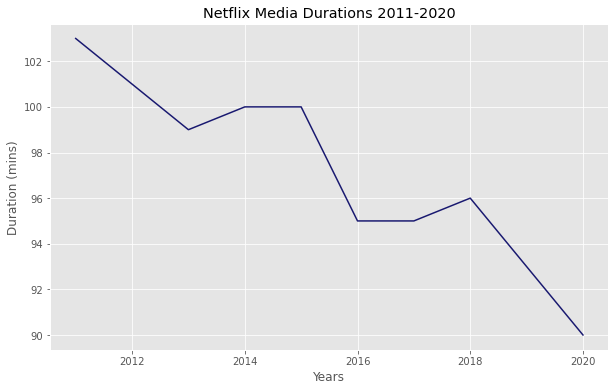

In [3]:
# Set plot style
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

# Draw a line plot of release_years and durations
plt.plot(durations_df['years'], durations_df['durations'], color='midnightblue')

# Create a title and labels
plt.title('Netflix Media Durations 2011-2020')
plt.xlabel('Years')
plt.ylabel('Duration (mins)')

# Show the plot
plt.show()

### Filter out non-movie types and remove non-critical columns in our analyses

In [4]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only.loc[:, ['title', 'country', 'genre', 'release_year', 'duration']]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


### Histogram

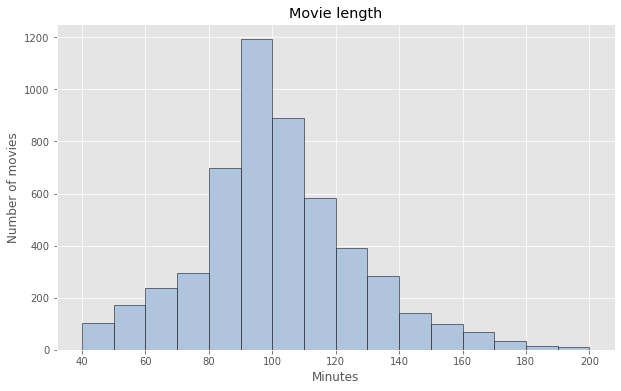

In [5]:
# Set Styles
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

# Histogram
plt.hist(netflix_df_movies_only['duration'], range=(40, 200), bins=16, ec='black', color="lightsteelblue")

# Titles and labels
plt.title('Movie length')
plt.xlabel('Minutes')
plt.ylabel('Number of movies')

# Display
plt.show()

### Scatterplots

In [6]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows():
    if row['genre'] == 'Children':
        colors.append('red')
    elif row['genre'] == 'Documentaries':
        colors.append('blue')
    elif row['genre'] == 'Stand-Up' :
        colors.append('green')
    else:
        colors.append('black')

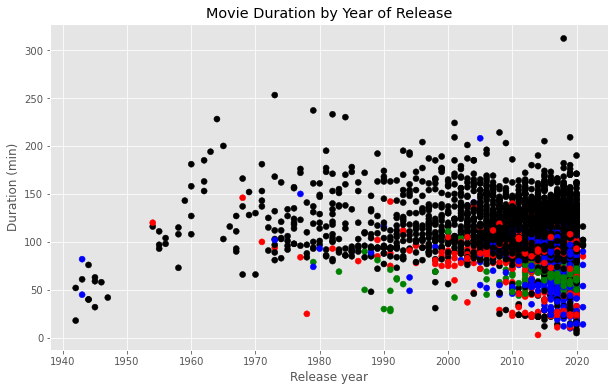

In [12]:
# Set the figure style and initalize a new figure
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'], c=colors)

# Create a title and axis labels
plt.title('Movie Duration by Year of Release')
plt.xlabel('Release year')
plt.ylabel('Duration (min)')

# Show the plot
plt.show()

#### The above plot confirms our lower duration assumptions about the durations of children's movies, documentaries, and stand-up comedies.

### Mean with Standard Deviation

In [8]:
statistics_grouped = netflix_df_movies_only['duration'].groupby(netflix_df_movies_only['release_year']).describe()

In [9]:
avg_runtime_by_year = statistics_grouped['mean']  # Mean
avg_runtime_lower_band = statistics_grouped['mean'] - statistics_grouped['std']  # Lower band of data created using standard deviation.
avg_runtime_upper_band = statistics_grouped['mean'] + statistics_grouped['std']  # Upper band of data.

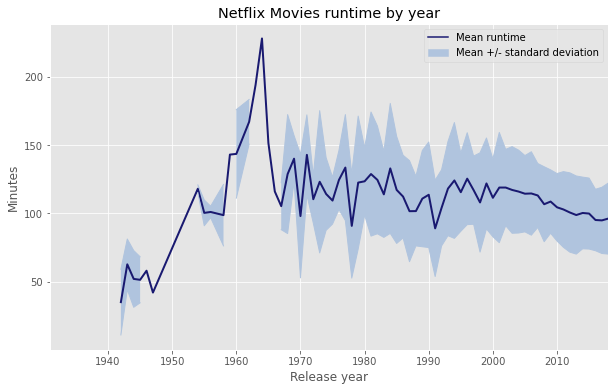

In [13]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(avg_runtime_by_year, color="midnightblue", linewidth=2)
ax1.plot(avg_runtime_lower_band, color="lightsteelblue", linewidth=1)
ax1.plot(avg_runtime_upper_band, color="lightsteelblue", linewidth=1)

ax1.fill_between(statistics_grouped.index, avg_runtime_lower_band, avg_runtime_upper_band, facecolor='lightsteelblue')
ax1.set_title('Netflix Movies runtime by year')
ax1.set_ylabel('Minutes')
ax1.set_xlabel('Release year')
ax1.set_xlim(1931, 2018)

legend_sd = mpatches.Patch(color='lightsteelblue', label='Mean +/- standard deviation')  
legend_line = mlines.Line2D([], [], color='midnightblue', label='Mean runtime')

ax1.legend(handles=[legend_line, legend_sd])
plt.show()

**We see an upward trend from 1940 to 1960, but no trend from 1970 to today.**

### Boxplot

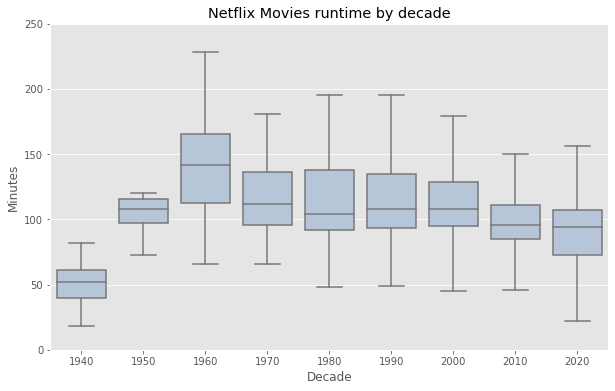

In [11]:
netflix_df_movies_only = netflix_df_movies_only.copy()
netflix_df_movies_only['release_year'] = ((netflix_df_movies_only['release_year'] // 10) * 10).astype('int64')

fig = plt.figure(figsize=(10,6))
sns.boxplot(x="release_year", y="duration", data=netflix_df_movies_only, color='lightsteelblue', showfliers=False)

plt.ylim(0,250)
plt.title('Netflix Movies runtime by decade')
plt.xlabel('Decade')
plt.ylabel('Minutes')

plt.show()

### Conclusion
**The data supports that there is no trend in the movies runtime. Line charts of Netflix movie durations by year show no indication of trending upward or downward. When filtering out netflix documentaries, children's movies, and stand-up comedies, we see no indication of any trends with the data points (black).**